In [1]:
from complex_mode_overlap import *
import numpy as np

# loading, reshaping, clipping COMSOL .dat

In [2]:
dat_fiber, param_fiber = loadData('../normE_fiber2.dat')
dat, param_list = loadData('../normE_all14.dat')


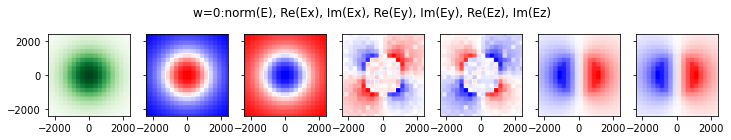

In [3]:
#plotComplexData(dat_fiber, range(4), bound=2500)

In [4]:
#plotComplexData(dat, param_list, bound=2500)

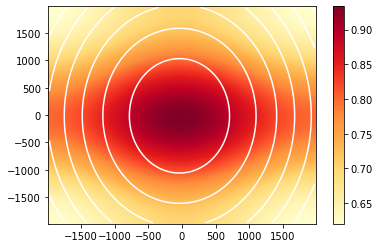

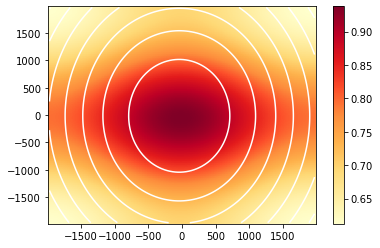

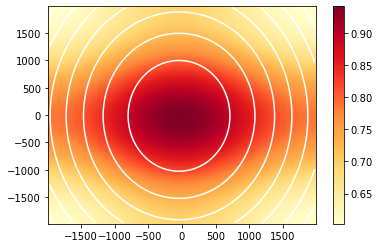

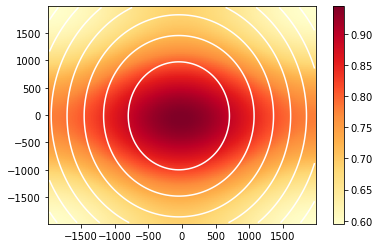

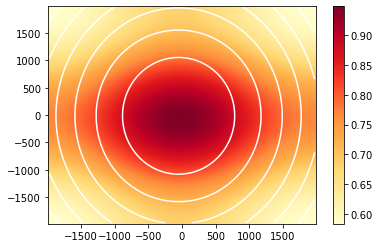

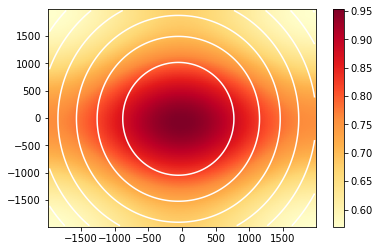

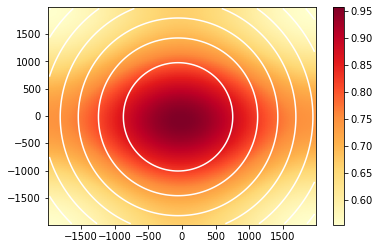

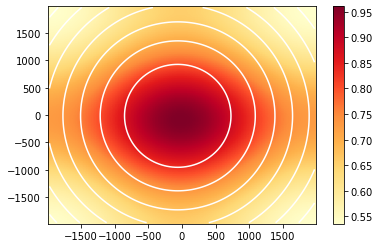

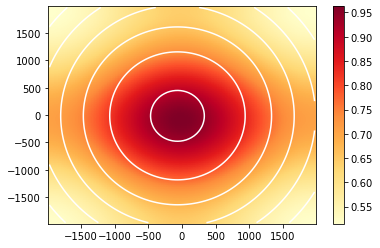

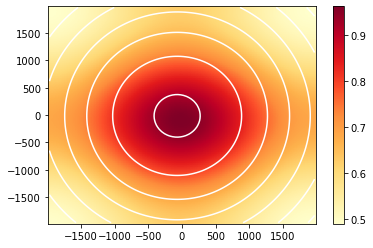

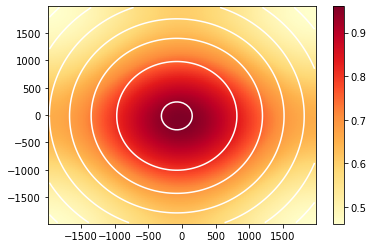

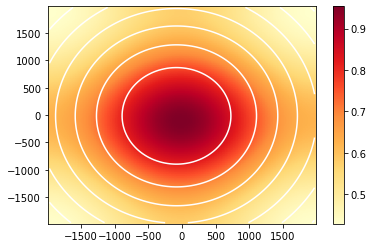

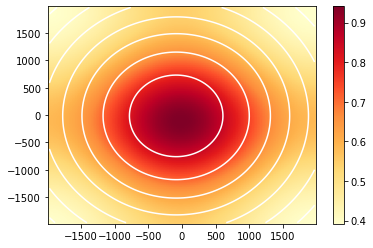

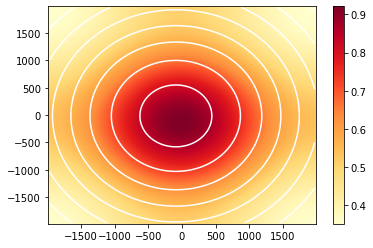

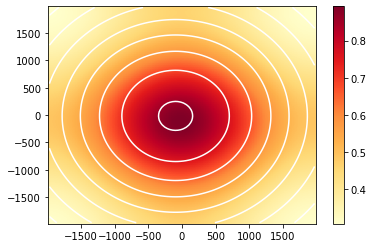

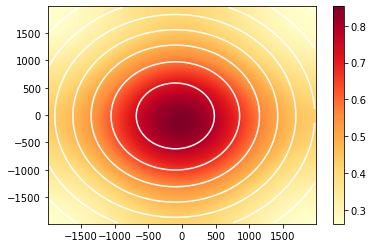

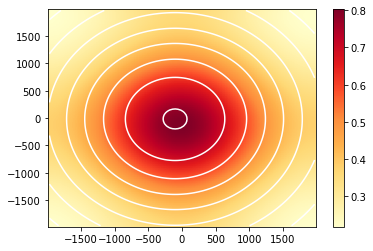

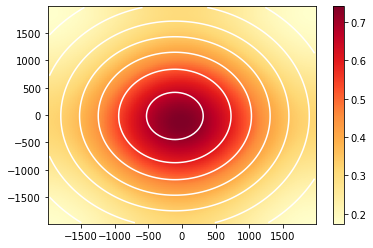

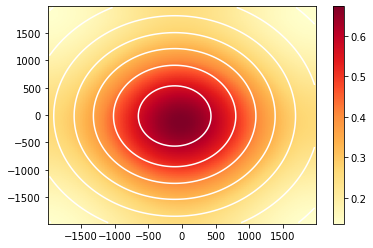

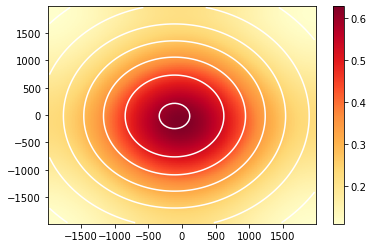

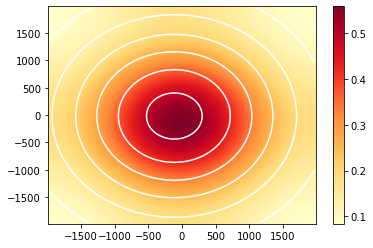

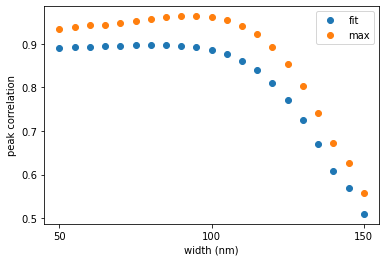

In [5]:
a1, a2, a3 = convolveComplex(dat_fiber, dat, param_list,
                 bound=2000, scale = 1,
                 res=100j, plotflag1 = True,
                 plotflag2=False, fitflag= True,
                 i=0)

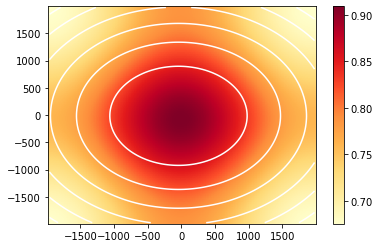

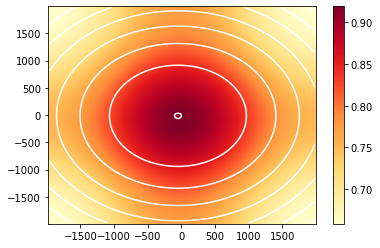

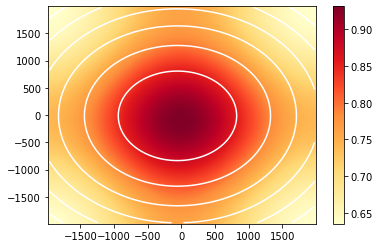

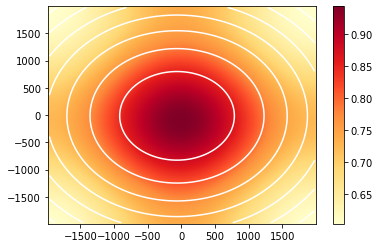

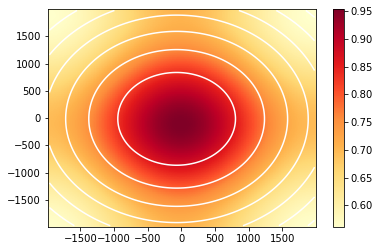

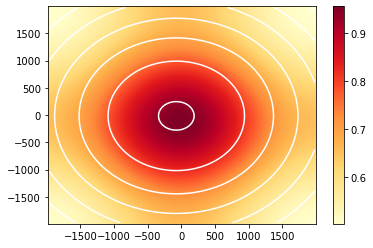

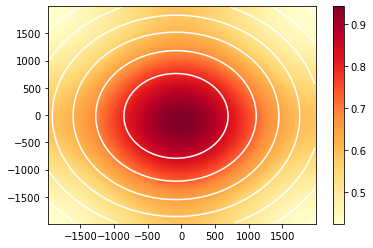

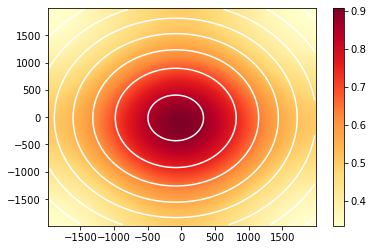

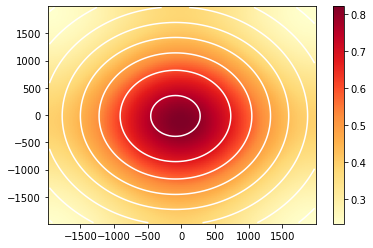

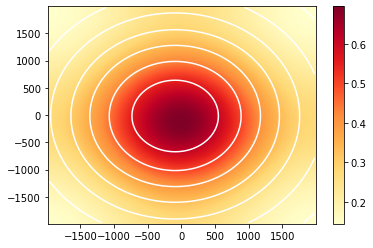

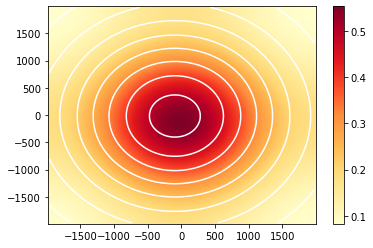

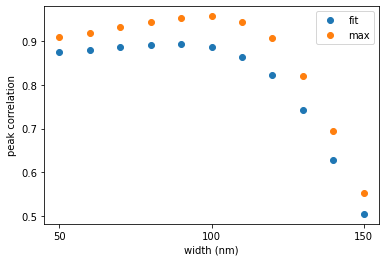

In [7]:
dat, param_list = loadData('../normE_all13.dat')
b1, b2, b3 = convolveComplex(dat_fiber, dat, param_list,
                 bound=2000, scale = 1,
                 res=100j, plotflag1 = False,
                 plotflag2=True, fitflag= True,
                 i=0)